# Import packeges

In [ ]:
import os # functions to interact with the operating system
import numpy as np # handling multi-dimensional arrays and matrices
import pandas as pd # handling dataframes
from matplotlib import pyplot as plt # visualization for 2D and 3D plots
%matplotlib inline
import seaborn as sns # based on matplotlib, for statistical graphics
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

# Downlaod dataset

In [ ]:
Heartdata=pd.read_csv('/content/heart.csv')
print(Heartdata.shape) #print number of rows,columns in dataset
print(Heartdata.columns)

(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
#show sample of dataset
Heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
Heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
Heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Heartdata['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
Heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
Heartdata.shape

(1025, 14)

# Visualize dataset and treat outliers

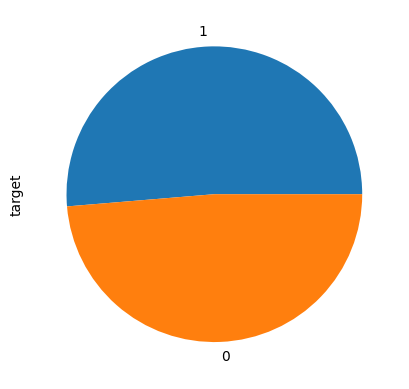

In [ ]:
Heartdata['target'].value_counts().plot(kind='pie');

In [ ]:
pd.set_option('display.max_rows', 100)
Heartdata['age'].value_counts(ascending=True)

74     3
76     3
77     3
29     4
37     6
34     6
69     9
40    11
71    11
38    12
68    12
39    14
70    14
35    15
49    17
47    18
50    21
46    23
48    23
66    25
45    25
43    26
42    26
53    26
65    27
55    30
61    31
67    31
41    32
63    32
64    34
44    36
60    37
62    37
56    39
51    39
52    43
59    46
54    53
57    57
58    68
Name: age, dtype: int64

In [ ]:
ind = Heartdata['age'].value_counts(dropna=False).keys().tolist()
val = Heartdata['age'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [ ]:
lc_sm = []
y = 'Less'
for val,ind in value_dict:
    if ind <= 3:
        lc_sm.append(val)
    else :
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [ ]:
Heartdata['age'] = Heartdata['age'].apply(lcdlt)

In [ ]:
Heartdata=Heartdata.drop(Heartdata[(Heartdata['age']=='Less')].index)

In [ ]:
pd.set_option('display.max_rows', 100)
Heartdata['age'].value_counts(ascending=True)

29     4
34     6
37     6
69     9
71    11
40    11
68    12
38    12
70    14
39    14
35    15
49    17
47    18
50    21
46    23
48    23
45    25
66    25
42    26
53    26
43    26
65    27
55    30
61    31
67    31
41    32
63    32
64    34
44    36
62    37
60    37
51    39
56    39
52    43
59    46
54    53
57    57
58    68
Name: age, dtype: int64

<Axes: xlabel='target', ylabel='count'>

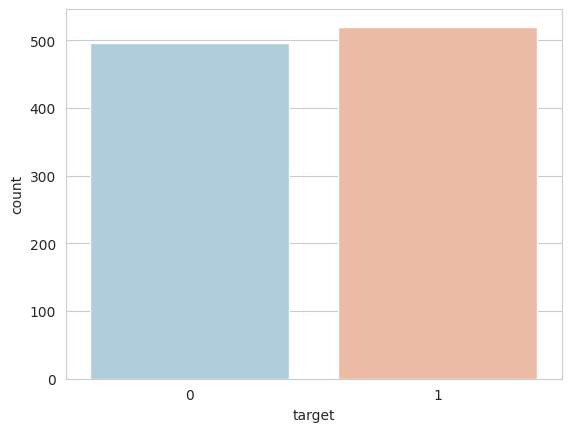

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=Heartdata,palette='RdBu_r')

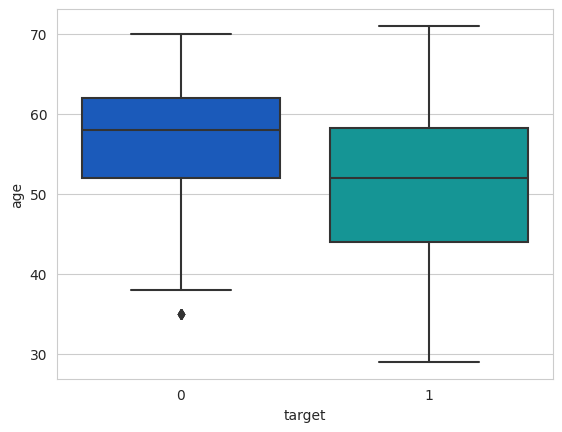

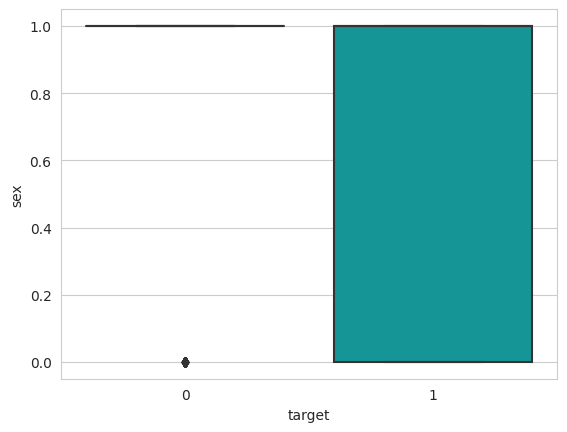

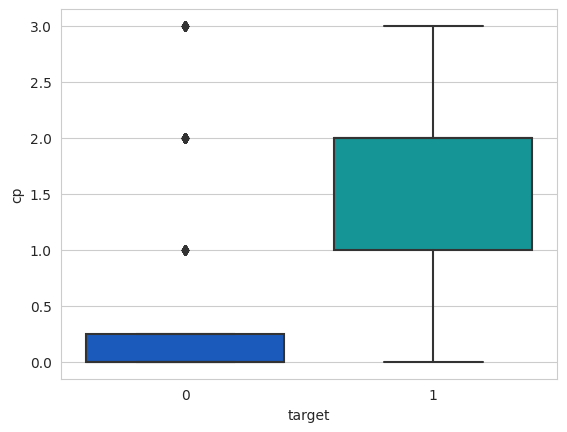

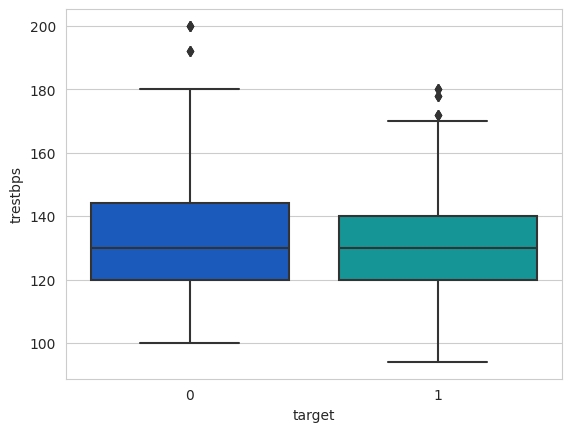

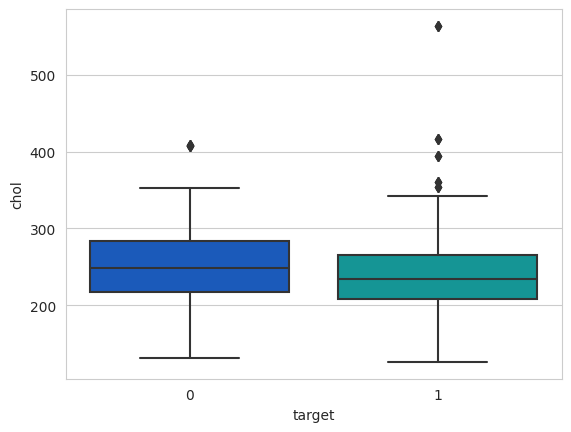

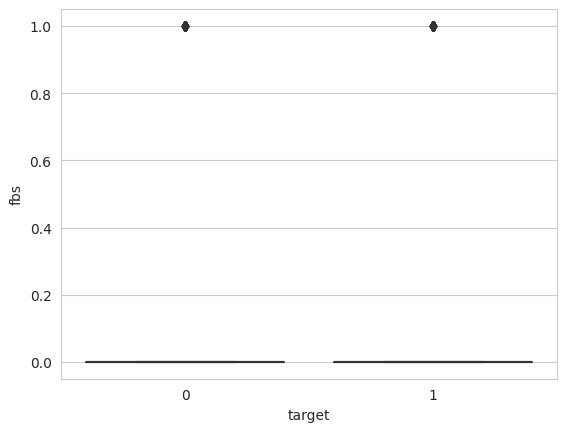

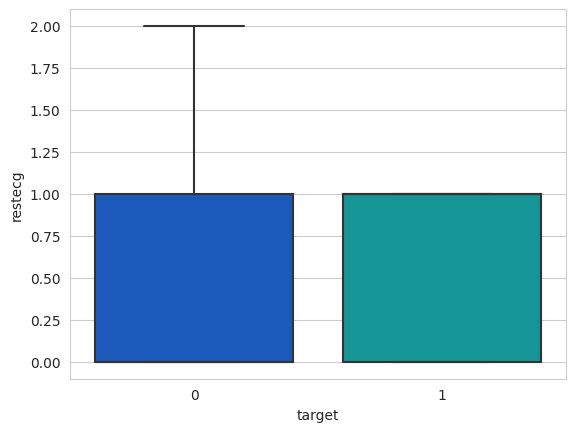

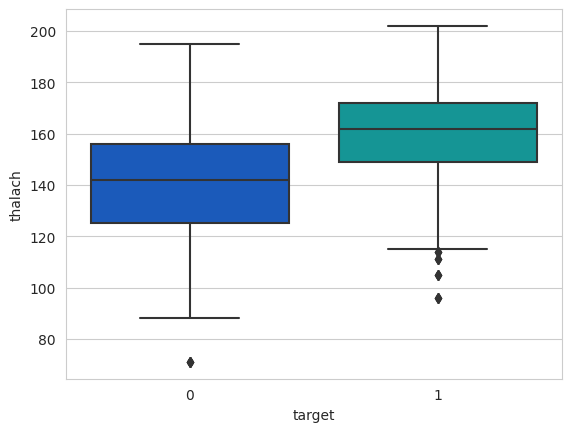

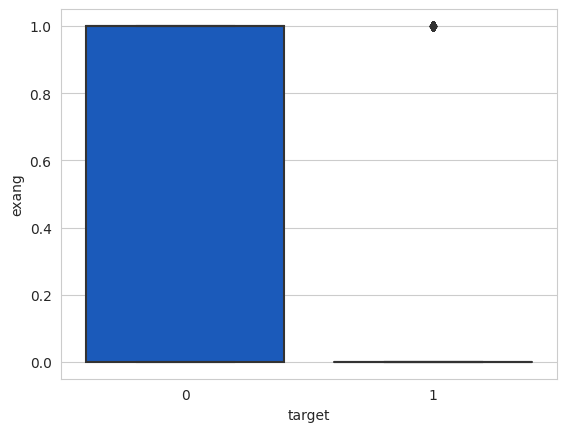

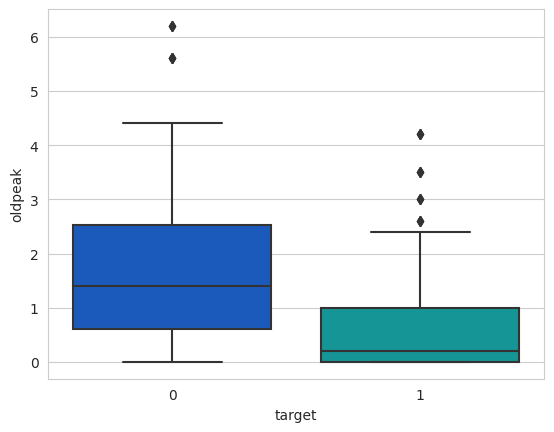

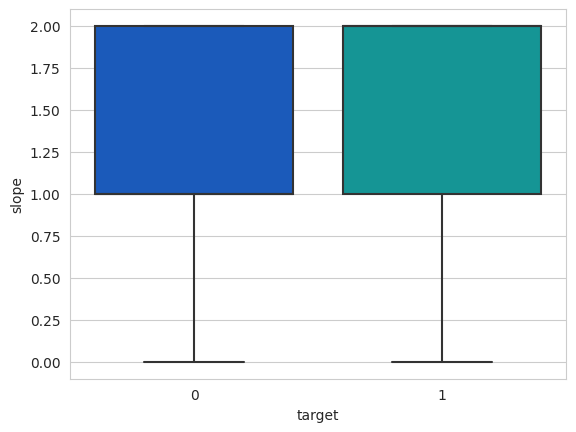

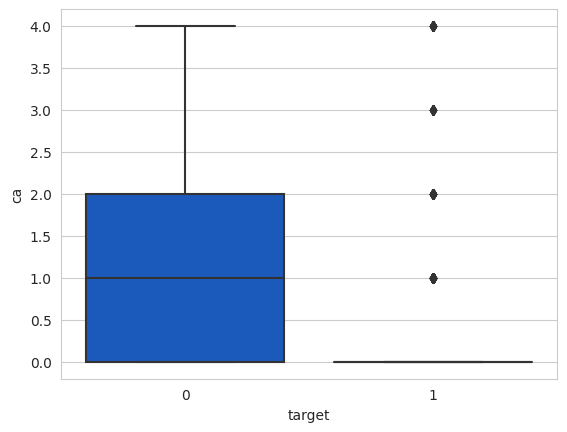

<Figure size 640x480 with 0 Axes>

In [ ]:
l=list(Heartdata.columns[0:13])
for i in range(len(l)-1):
    sns.boxplot(x='target',y=l[i], data=Heartdata, palette='winter')
    plt.figure()

# For age column

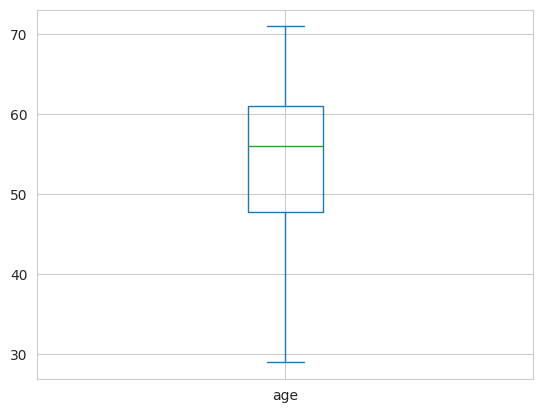

In [ ]:
Heartdata['age'].plot(kind='box')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

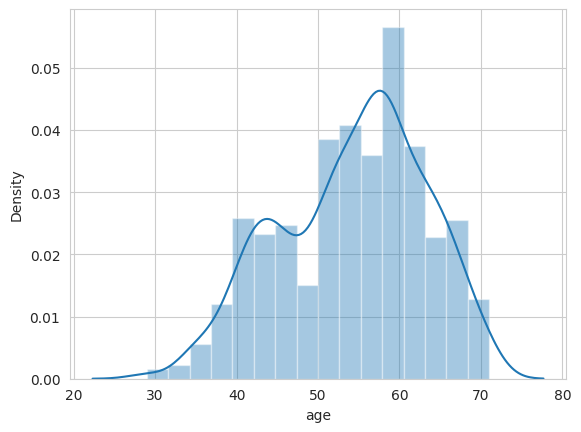

In [ ]:
sns.distplot(Heartdata['age'])

# For sex column

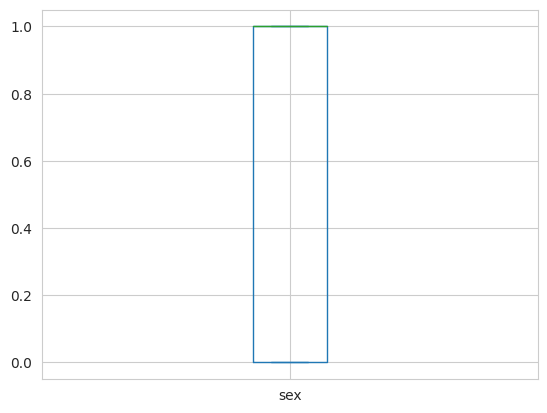

In [ ]:
Heartdata['sex'].plot(kind='box')
plt.show()

<Axes: xlabel='sex', ylabel='Density'>

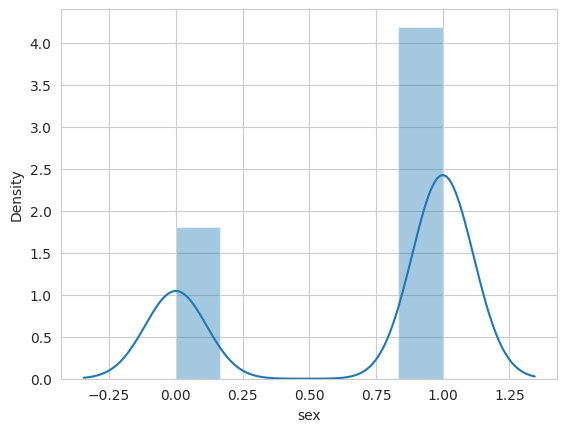

In [ ]:
sns.distplot(Heartdata['sex'])

# For cp column

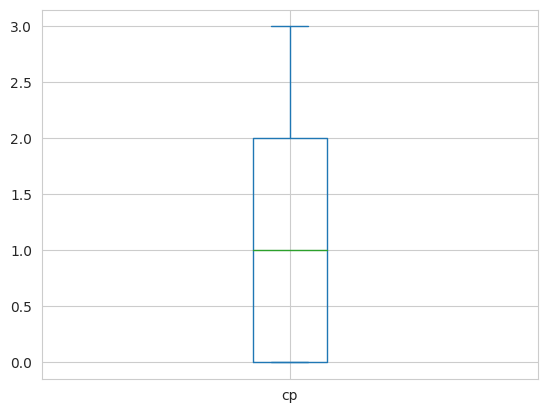

In [ ]:
Heartdata['cp'].plot(kind='box')
plt.show()

<Axes: xlabel='cp', ylabel='Density'>

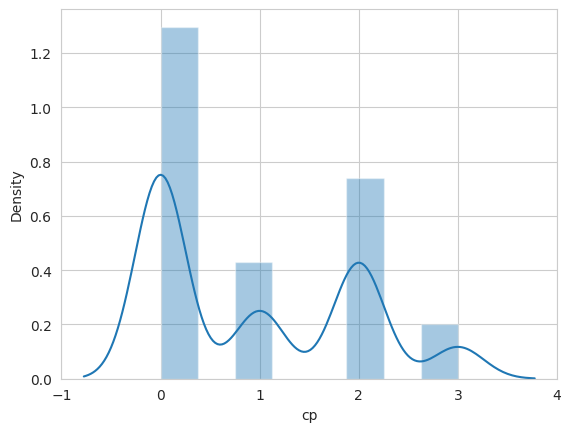

In [ ]:
sns.distplot(Heartdata['cp'])

# For trestbps column

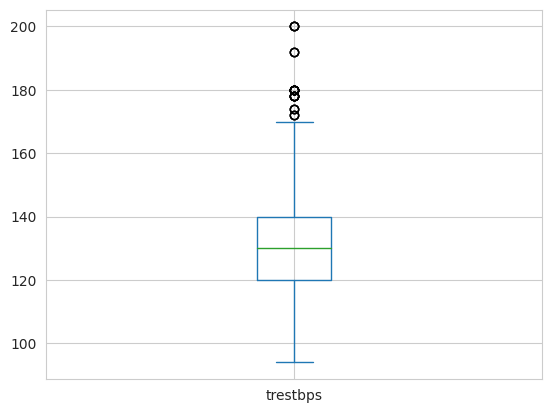

In [ ]:
Heartdata['trestbps'].plot(kind='box')
plt.show()
####outliers

<Axes: xlabel='trestbps', ylabel='Density'>

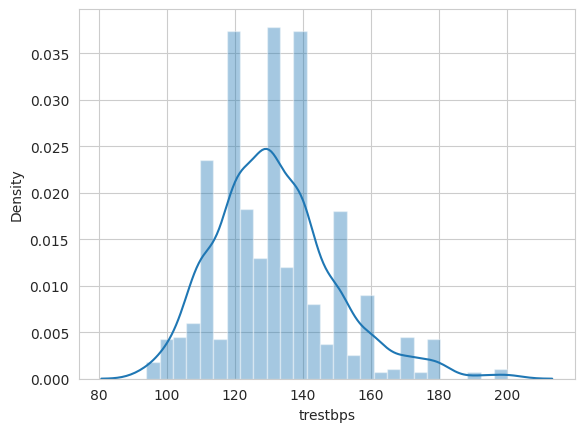

In [ ]:
sns.distplot(Heartdata['trestbps'])

In [ ]:
Q1 = Heartdata.trestbps.quantile(0.25)
Q2 = Heartdata.trestbps.quantile(0.50)
Q3 =  Heartdata.trestbps.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

90.0

170.0

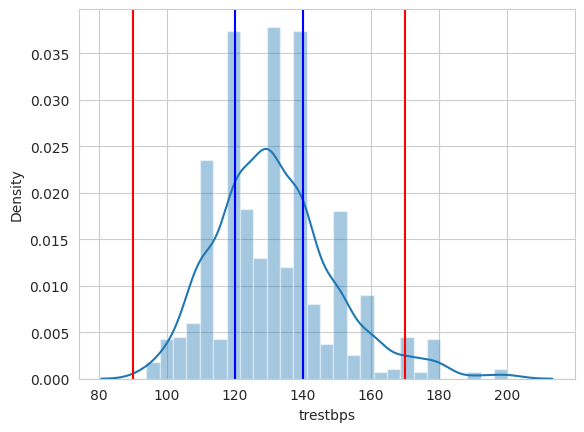

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Plot
sns.distplot( Heartdata.trestbps)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.trestbps<LC) | (Heartdata.trestbps>UC)].reset_index(drop=True).shape

# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.trestbps>LC) & (Heartdata.trestbps<UC)]
df.head()

# For chol column

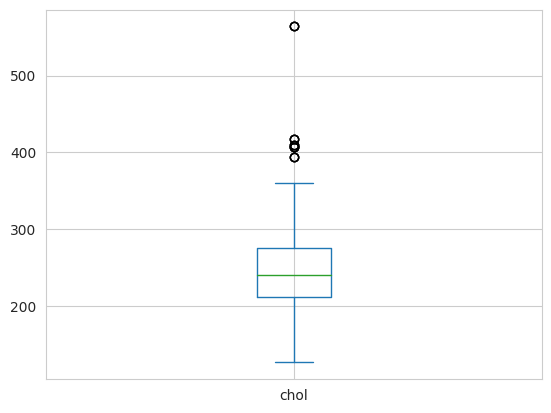

In [ ]:
Heartdata['chol'].plot(kind='box')
plt.show()
####outliers

<Axes: xlabel='chol', ylabel='Density'>

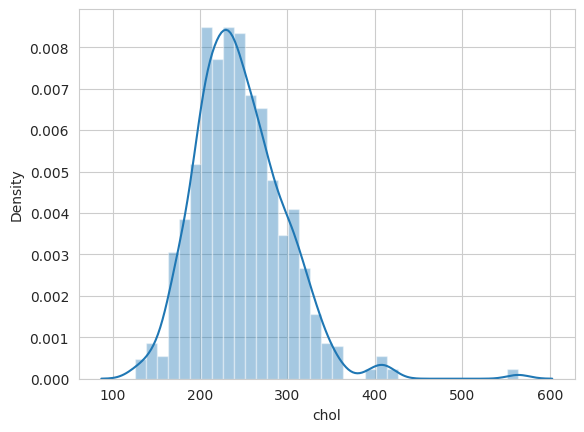

In [ ]:
sns.distplot(Heartdata['chol'])

In [ ]:
Q1 = Heartdata.chol.quantile(0.25)
Q2 = Heartdata.chol.quantile(0.50)
Q3 =  Heartdata.chol.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

115.0

371.0

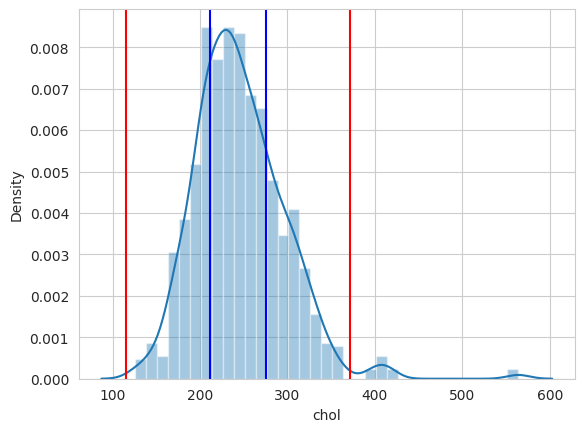

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Plot
sns.distplot( Heartdata.chol)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.chol<LC) | (Heartdata.chol>UC)].reset_index(drop=True).shape

# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.chol>LC) & (Heartdata.chol<UC)]
df.head()

# For fbs column

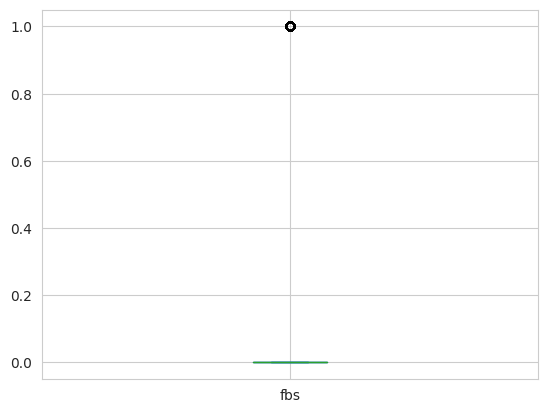

In [ ]:
Heartdata['fbs'].plot(kind='box')
plt.show()
####outlier

<Axes: xlabel='fbs', ylabel='Density'>

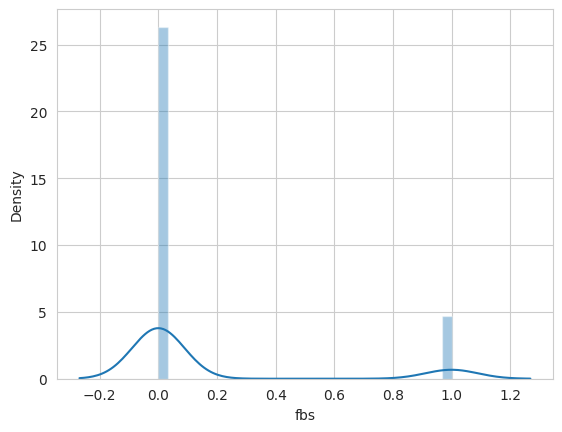

In [ ]:
sns.distplot(Heartdata['fbs'])

# For restecg column

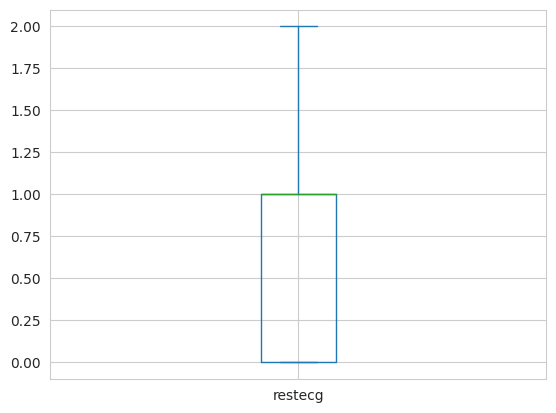

In [ ]:
Heartdata['restecg'].plot(kind='box')
plt.show()

<Axes: xlabel='restecg', ylabel='Density'>

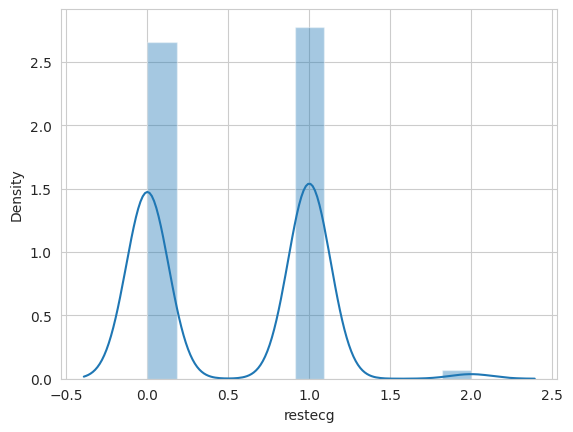

In [ ]:
sns.distplot(Heartdata['restecg'])

# For thaclach column

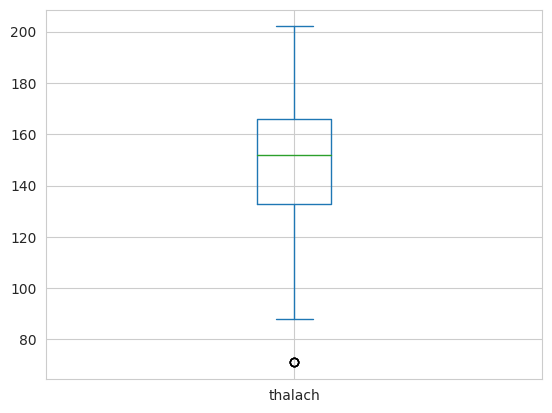

In [ ]:
Heartdata['thalach'].plot(kind='box')
plt.show()
####outlier

<Axes: xlabel='thalach', ylabel='Density'>

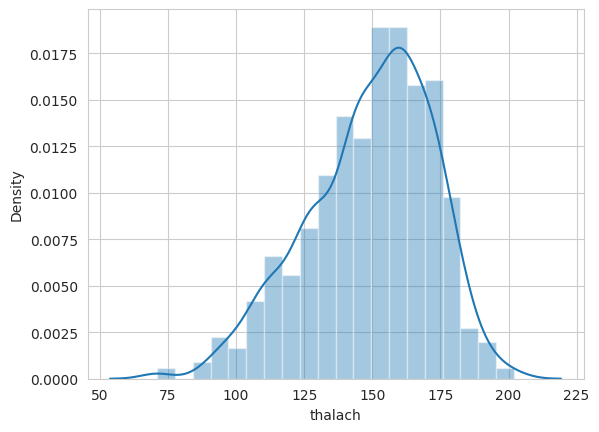

In [ ]:
sns.distplot(Heartdata['thalach'])

82.875

215.875

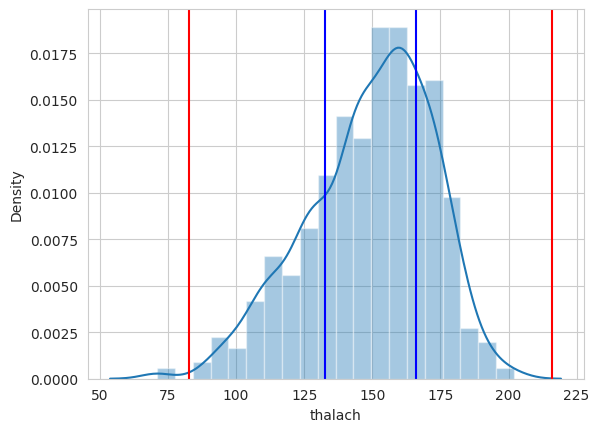

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
Q1 = Heartdata.thalach.quantile(0.25)
Q2 = Heartdata.thalach.quantile(0.50)
Q3 =  Heartdata.thalach.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

# Plot
sns.distplot( Heartdata.thalach)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.thalach<LC) | (Heartdata.thalach>UC)].reset_index(drop=True).shape

# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.thalach>LC) & (Heartdata.thalach<UC)]
df.head()

#check
df[(df.trestbps<LC) | (df.trestbps>UC)].reset_index(drop=True)

In [ ]:
# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.thalach<LC) | (Heartdata.thalach>UC)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
1,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
2,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
3,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.thalach>LC) & (Heartdata.thalach<UC)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#check
df[(df.thalach<LC) | (df.thalach>UC)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# For exang column

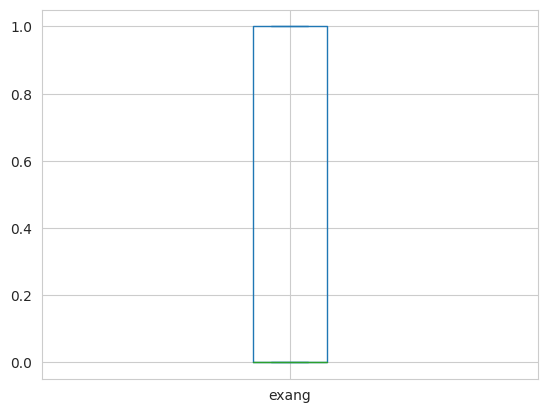

In [ ]:
Heartdata['exang'].plot(kind='box')
plt.show()

<Axes: xlabel='exang', ylabel='Density'>

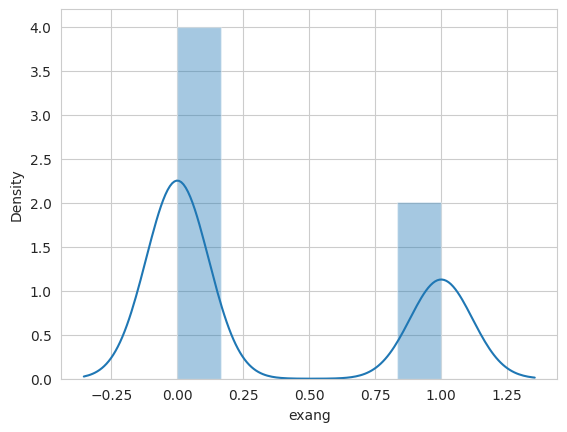

In [ ]:
sns.distplot(Heartdata['exang'])

# For oldpeak column

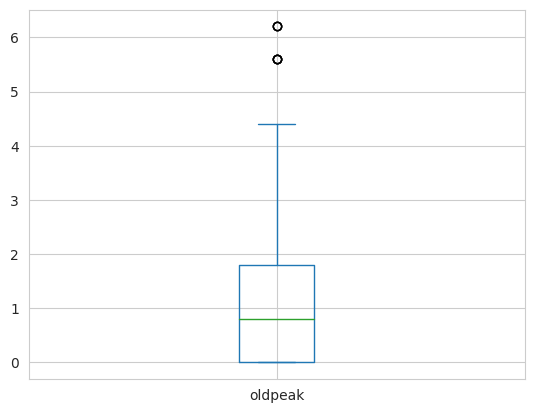

In [ ]:
Heartdata['oldpeak'].plot(kind='box')
plt.show()
####outlier

<Axes: xlabel='oldpeak', ylabel='Density'>

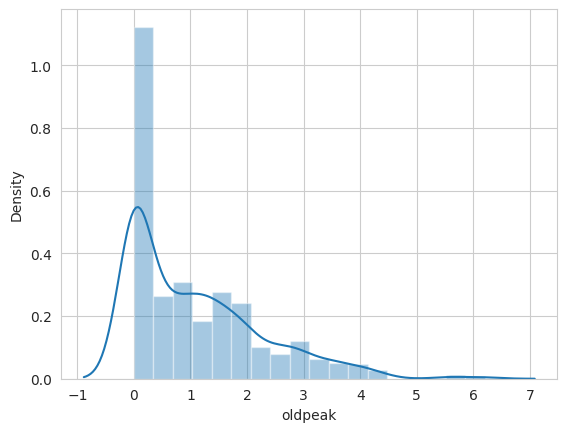

In [ ]:
sns.distplot(Heartdata['oldpeak'])

-2.7

4.5

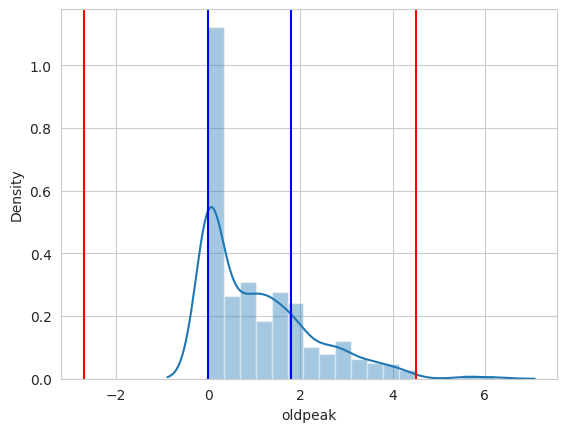

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
Q1 = Heartdata.oldpeak.quantile(0.25)
Q2 = Heartdata.oldpeak.quantile(0.50)
Q3 =  Heartdata.oldpeak.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

# Plot
sns.distplot( Heartdata.oldpeak)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.oldpeak<LC) | (Heartdata.oldpeak>UC)].reset_index(drop=True).shape

# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.oldpeak>LC) & (Heartdata.oldpeak<UC)]
df.head()

#check
df[(df.oldpeak<LC) | (df.oldpeak>UC)].reset_index(drop=True)

In [ ]:
# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.oldpeak<LC) | (Heartdata.oldpeak>UC)].reset_index(drop=True).shape

(7, 14)

In [ ]:
# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.oldpeak>LC) & (Heartdata.oldpeak<UC)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#check
df[(df.oldpeak<LC) | (df.oldpeak>UC)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# For slope column

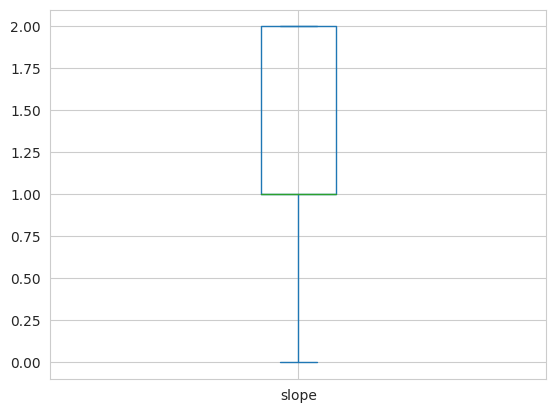

In [ ]:
Heartdata['slope'].plot(kind='box')
plt.show()

<Axes: xlabel='slope', ylabel='Density'>

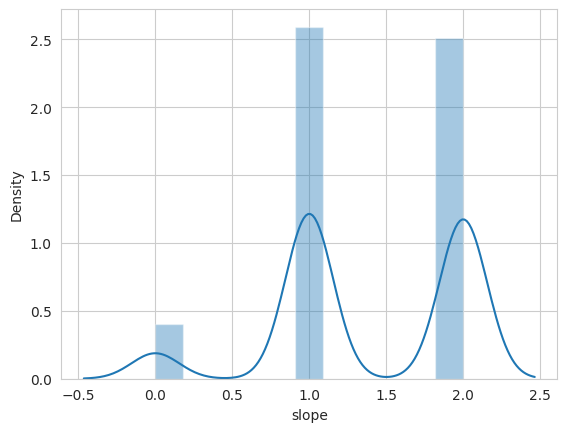

In [ ]:
sns.distplot(Heartdata['slope'])

# For ca column

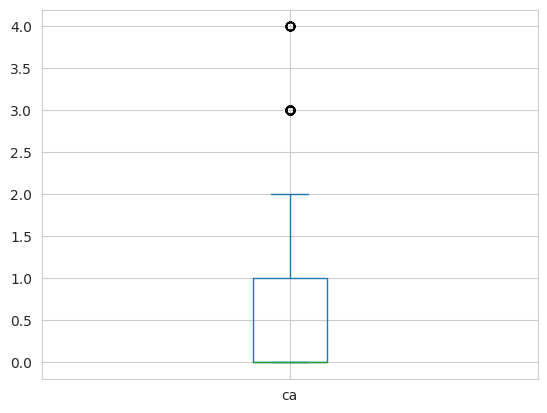

In [ ]:
Heartdata['ca'].plot(kind='box')
plt.show()
####outlier

<Axes: xlabel='ca', ylabel='Density'>

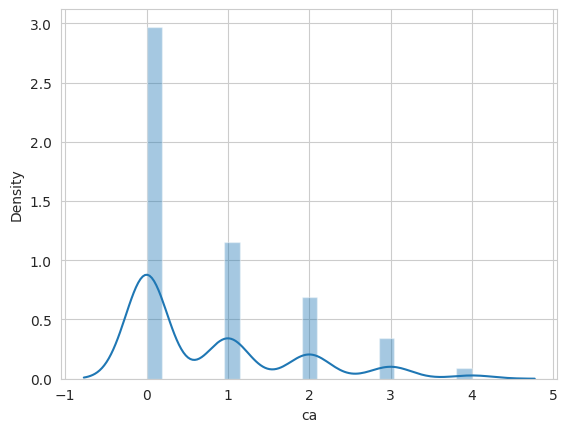

In [ ]:
sns.distplot(Heartdata['ca'])

-1.5

2.5

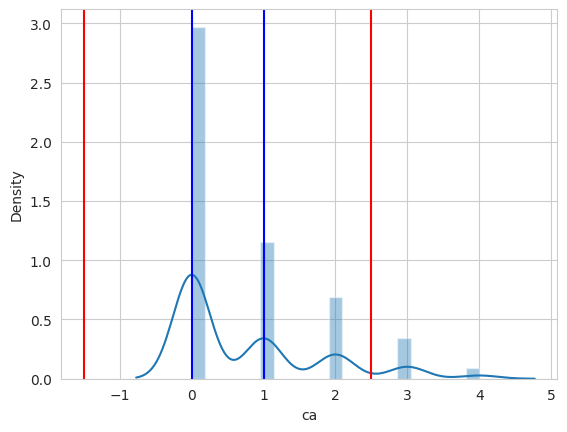

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
Q1 = Heartdata.ca.quantile(0.25)
Q2 = Heartdata.ca.quantile(0.50)
Q3 =  Heartdata.ca.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

# Plot
sns.distplot( Heartdata.ca)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.ca<LC) | (Heartdata.ca>UC)].reset_index(drop=True).shape

# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.ca>LC) & (Heartdata.ca<UC)]
df.head()

#check
df[(df.slope<LC) | (df.slope>UC)].reset_index(drop=True)

In [ ]:
# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.ca<LC) | (Heartdata.ca>UC)].reset_index(drop=True).shape


(84, 14)

In [ ]:
df = Heartdata[(Heartdata.ca>LC) & (Heartdata.ca<UC)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [ ]:
#check
df[(df.slope<LC) | (df.slope>UC)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# For thal column

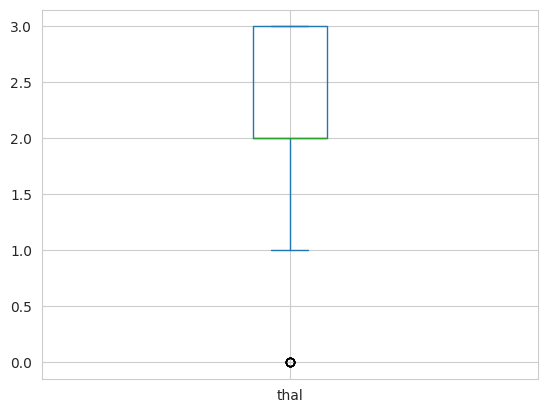

In [ ]:
Heartdata['thal'].plot(kind='box')
plt.show()
####outlier

<Axes: xlabel='thal', ylabel='Density'>

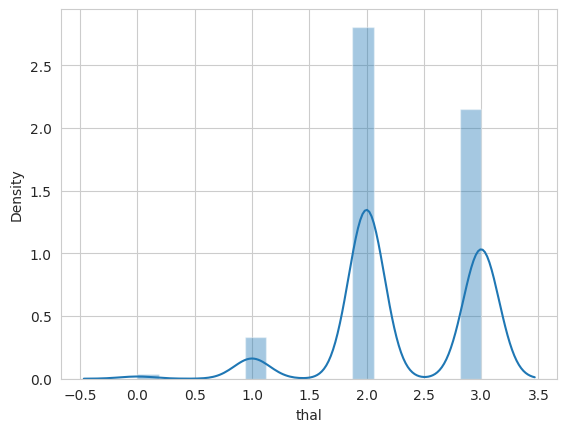

In [ ]:
sns.distplot(Heartdata['thal'])

0.5

4.5

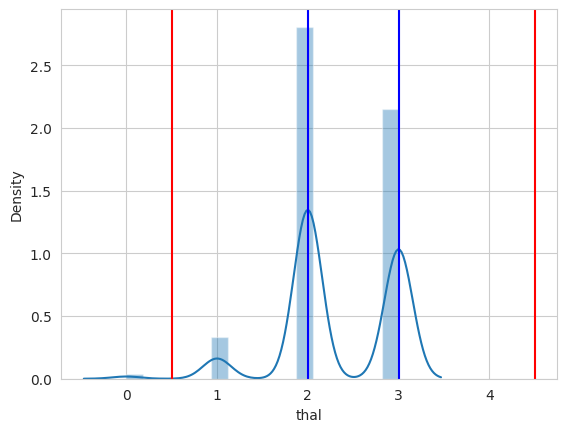

In [ ]:
Q1 = Heartdata.thal.quantile(0.25)
Q2 = Heartdata.thal.quantile(0.50)
Q3 =  Heartdata.thal.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

# Plot
sns.distplot( Heartdata.thal)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='b')
plt.axvline(Q3, color='b')
plt.show()

In [ ]:
# Find dimensions of Outliers wrt IQR (less than lower limit or greater than upper limit)

Heartdata[(Heartdata.thal<LC) | (Heartdata.thal>UC)].reset_index(drop=True).shape

(7, 14)

In [ ]:
# Store the clean data wrt IQR (drop the outliers)

df = Heartdata[(Heartdata.thal>LC) & (Heartdata.thal<UC)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#check
df[(df.thal<LC) | (df.thal>UC)].reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# For target column

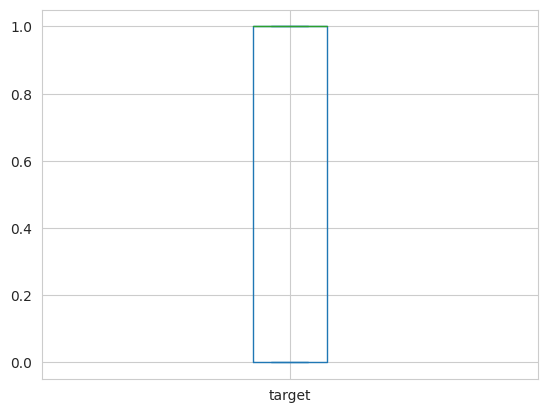

In [ ]:
Heartdata['target'].plot(kind='box')
plt.show()

<Axes: xlabel='target', ylabel='Density'>

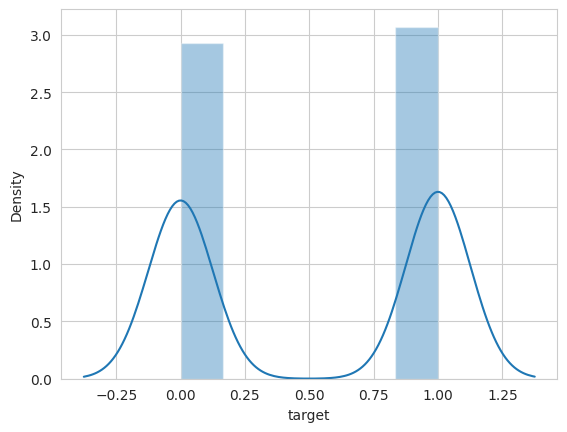

In [ ]:
sns.distplot(Heartdata['target'])

# Scaling the numerical features
Normalization: Min Max Scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MS = MinMaxScaler()
MinMax_ScaledData = MS.fit_transform(df)
MinMax_ScaledData

array([[0.54761905, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.57142857, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.97619048, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42857143, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.5       ],
       [0.5       , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.5952381 , 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [ ]:
# add scaled columns to the data
df['scaled age'] = MinMax_ScaledData[ :,0]
df['scaled sex'] = MinMax_ScaledData[ :,1]
df['scaled cp'] = MinMax_ScaledData[ :,2]
df['scaled trestbps'] = MinMax_ScaledData[ :,3]
df['scaled chol'] = MinMax_ScaledData[ :,4]
df['scaled fbs'] = MinMax_ScaledData[ :,5]
df['scaled restecg'] = MinMax_ScaledData[ :,6]
df['scaled thalach'] = MinMax_ScaledData[ :,7]
df['scaled exang'] = MinMax_ScaledData[ :,8]
df['scaled oldpeak'] = MinMax_ScaledData[ :,9]
df['scaled slope'] = MinMax_ScaledData[ :,10]
df['scaled ca'] = MinMax_ScaledData[ :,11]
df['scaled thal'] = MinMax_ScaledData[ :,12]

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,scaled trestbps,scaled chol,scaled fbs,scaled restecg,scaled thalach,scaled exang,scaled oldpeak,scaled slope,scaled ca,scaled thal
0,52,1,0,125,212,0,1,168,0,1.0,...,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.0
1,53,1,0,140,203,1,0,155,1,3.1,...,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.0
2,70,1,0,145,174,0,1,125,1,2.6,...,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.0
3,61,1,0,148,203,0,1,161,0,0.0,...,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.0
4,62,0,0,138,294,1,1,106,0,1.9,...,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.5


In [ ]:
#kurtosis (tail)
print(Heartdata['thal'].kurt())
print(df['scaled thal'].kurt())

#skewness (change)
print(Heartdata['thal'].skew())
print(df['scaled thal'].skew())

0.24707751949423873
-0.6643006126243938
-0.5365870285063621
-0.2861342719419813


# Rest of code

Explore the data to figure out what they look like

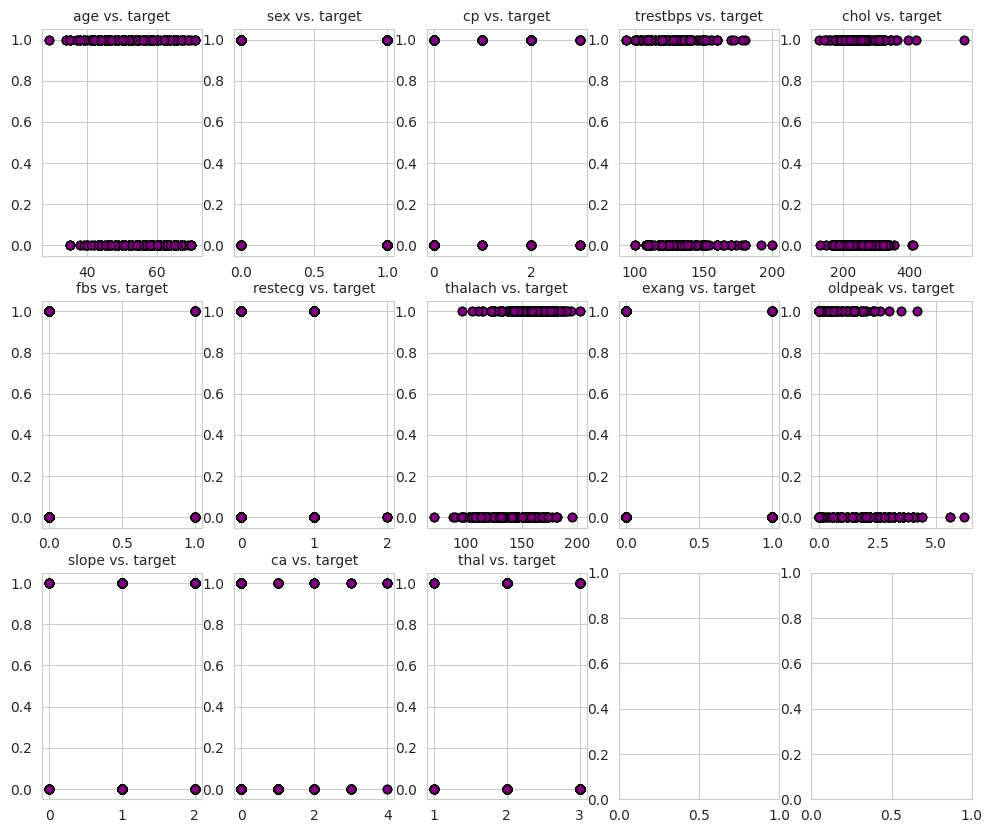

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(12,10))
ax = ax.ravel()
for i in range(13):
    ax[i].scatter(df[df.columns[i]],df['target'],edgecolor='k',color='purple',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. target",fontsize=10)
    ax[i].grid(True)
plt.show()

In [ ]:
#Show unclassified data
X = df.drop([ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
             'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ], axis=1)
Y = df['target']

In [ ]:
X.head()

,scaled age,scaled sex,scaled cp,scaled trestbps,scaled chol,scaled fbs,scaled restecg,scaled thalach,scaled exang,scaled oldpeak,scaled slope,scaled ca,scaled thal
0,0.547619,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.0
1,0.571429,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.0
2,0.976190,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.0
3,0.761905,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.0
4,0.785714,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.5


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Split the data into attributes (training) and labels (testing)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) #split data with 0.25% testing , 0.75% training

Train the SVM algorithm

In [ ]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
print("SVCModel train score is: ",model.score(x_train,y_train))
print("SVCModel test score is: ",model.score(x_test,y_test))

SVCModel train score is:  0.9074074074074074
SVCModel test score is:  0.9169960474308301


In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X, Y)
perm_importance

{'importances_mean': array([0.00574827, 0.06263627, 0.05827552, 0.01030723, 0.00019822,
        0.02299306, 0.01625372, 0.01922696, 0.04281467, 0.01090188,
        0.02993062, 0.04796829, 0.04717542]),
 'importances_std': array([0.00145658, 0.00367636, 0.00855779, 0.0048795 , 0.00039643,
        0.00229452, 0.00247572, 0.00262963, 0.00276083, 0.00217135,
        0.00499095, 0.0051916 , 0.00399394]),
 'importances': array([[0.00693756, 0.00693756, 0.00396432, 0.00693756, 0.00396432],
        [0.0604559 , 0.0604559 , 0.0654113 , 0.06838454, 0.05847374],
        [0.0604559 , 0.04856293, 0.04856293, 0.0703667 , 0.06342914],
        [0.00792864, 0.01982161, 0.00891972, 0.00891972, 0.00594648],
        [0.        , 0.        , 0.00099108, 0.        , 0.        ],
        [0.02675917, 0.02180377, 0.02378593, 0.01982161, 0.02279485],
        [0.01288404, 0.01883053, 0.01684836, 0.01883053, 0.01387512],
        [0.01883053, 0.02378593, 0.01585728, 0.01982161, 0.01783944],
        [0.04658077, 0

In [ ]:
importance= perm_importance.importances_mean

In [ ]:
imp=pd.Series(importance, index=X.columns).sort_values(ascending=False)

Feature: 0, Score: 0.06264
Feature: 1, Score: 0.05828
Feature: 2, Score: 0.04797
Feature: 3, Score: 0.04718
Feature: 4, Score: 0.04281
Feature: 5, Score: 0.02993
Feature: 6, Score: 0.02299
Feature: 7, Score: 0.01923
Feature: 8, Score: 0.01625
Feature: 9, Score: 0.01090
Feature: 10, Score: 0.01031
Feature: 11, Score: 0.00575
Feature: 12, Score: 0.00020


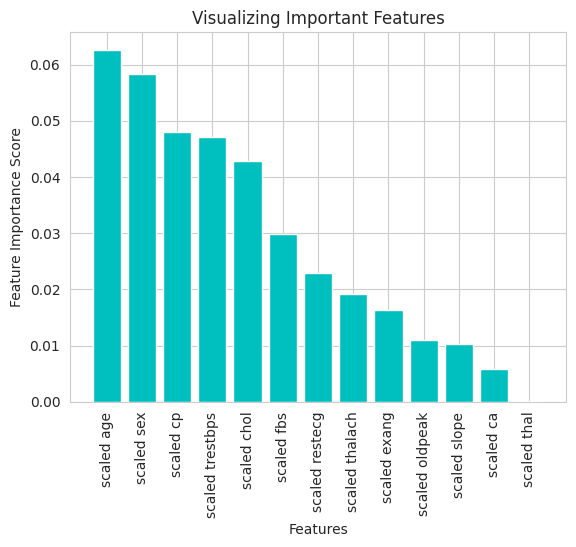

In [ ]:
for i,v in enumerate(imp):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X.columns.values, imp , color='c')
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features");
plt.show()

In [ ]:
# Removing less important features
new_train = X.drop([ 'scaled age' ,'scaled trestbps' , 'scaled chol'], axis=1)
new_train.head()

,scaled sex,scaled cp,scaled fbs,scaled restecg,scaled thalach,scaled exang,scaled oldpeak,scaled slope,scaled ca,scaled thal
0,1.0,0.0,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.0
1,1.0,0.0,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.0
2,1.0,0.0,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.0
3,1.0,0.0,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.0
4,0.0,0.0,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.5


In [ ]:
'''
sklearn.svm.SVC(c=1,kernel='rbf', degree=3, gamma='scale',
                coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None,
                verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
'''
#define the model
classifier=SVC(kernel='rbf',random_state=0, C= 3) # kernel='rbf' as decision boundry will be not straight line
#train the model
classifier.fit(x_train,y_train)
print("SVCModel train score is: ",classifier.score(x_train,y_train))
print("SVCModel test score is: ",classifier.score(x_test,y_test))

SVCModel train score is:  0.9470899470899471
SVCModel test score is:  0.932806324110672


Make some predictions

In [ ]:
y_pred=classifier.predict(x_test)
print("predicted value for SVCModel is: ",y_pred[:10])

predicted value for SVCModel is:  [1 1 1 1 1 0 0 0 1 0]


Calculate Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#calculate the confusion matrix to test the accuracy of prediction
cm=confusion_matrix(y_test,y_pred)
#if main diagonal(TN,TP) has high values that means there is high accuracy
print('Confuison Matrix is: \n', cm)

Confuison Matrix is: 
 [[111  11]
 [  6 125]]


Plot the confusion matrix

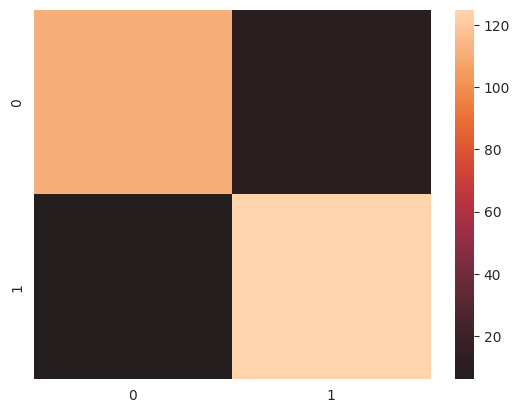

In [ ]:
import seaborn as sns
sns.heatmap(cm,center=True) #center: colour map
plt.show()

In [ ]:
predictions = classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[111  11]
 [  6 125]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       122
           1       0.92      0.95      0.94       131

    accuracy                           0.93       253
   macro avg       0.93      0.93      0.93       253
weighted avg       0.93      0.93      0.93       253



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(classifier, X,Y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96534653 0.95049505 0.93564356 0.88613861 0.89054726]
Average CV Score:  0.9256342052115659
Number of CV Scores used in Average:  5


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf' , 'poly' , 'sigmoid' , 'linear']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
# May take awhile!
grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
print("SVCModel train score is: ",grid.score(x_train,y_train))
print("SVCModel test score is: ",grid.score(x_test,y_test))

SVCModel train score is:  1.0
SVCModel test score is:  1.0


In [ ]:
cm=confusion_matrix(y_test,grid_predictions)
print('Confuison Matrix is: \n', cm)

Confuison Matrix is: 
 [[122   0]
 [  0 131]]


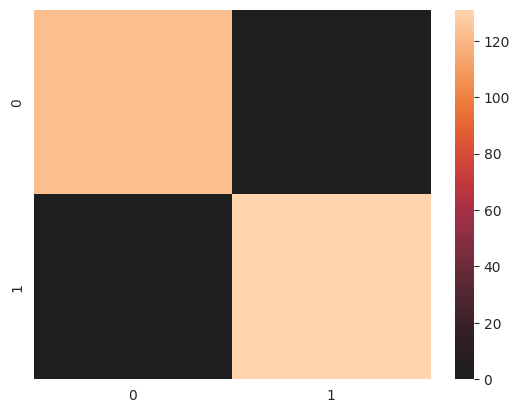

In [ ]:
sns.heatmap(cm,center=True) #center: colour map
plt.show()

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       131

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(grid, X,Y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Cross Validation Scores:  [0.98019802 0.97029703 1.         1.         0.98507463]
Average CV Score:  0.9871139352741244
Number of CV Scores used in Average:  5


In [ ]:
print("SVCModel train score with default parameters is: ",model.score(x_train,y_train))
print("SVCModel test score with default parameters is: ",model.score(x_test,y_test))
print('-------------------------------------------------------------------')
print("SVCModel train score with random parameters is: ",classifier.score(x_train,y_train))
print("SVCModel test score with random parameters is: ",classifier.score(x_test,y_test))
print('-------------------------------------------------------------------')
print("SVCModel train score after gridsearch is: ",grid.score(x_train,y_train))
print("SVCModel test score after gridsearch is: ",grid.score(x_test,y_test))

SVCModel train score with default parameters is:  0.9074074074074074
SVCModel test score with default parameters is:  0.9169960474308301
-------------------------------------------------------------------
SVCModel train score with random parameters is:  0.9470899470899471
SVCModel test score with random parameters is:  0.932806324110672
-------------------------------------------------------------------
SVCModel train score after gridsearch is:  1.0
SVCModel test score after gridsearch is:  1.0


In [ ]:
print('SVCModel with:')
print("train score with default parameters: ",model.score(x_train,y_train))
print("test score with default parameters: ",model.score(x_test,y_test))
print('-------------------------------------------------------')
print("train score with random parameters: ",classifier.score(x_train,y_train))
print("test score with random parameters: ",classifier.score(x_test,y_test))
print('-------------------------------------------------------')
print("train score after gridsearch: ",grid.score(x_train,y_train))
print("test score after gridsearch: ",grid.score(x_test,y_test))

SVCModel with:
train score with default parameters:  0.9074074074074074
test score with default parameters:  0.9169960474308301
-------------------------------------------------------
train score with random parameters:  0.9470899470899471
test score with random parameters:  0.932806324110672
-------------------------------------------------------
train score after gridsearch:  1.0
test score after gridsearch:  1.0


Evaluate the results of the algorithm

In [ ]:
'''while trying different values I discovered that:
rbf better than poly & sigmoid in accuracy
gamma="scale" is the best in accuracy
we trying to get best accuracy and avoid overfitting & underfitting'''

'while trying different values I discovered that:\nrbf better than poly & sigmoid in accuracy\ngamma="scale" is the best in accuracy\nwe trying to get best accuracy and avoid overfitting & underfitting'

In [ ]:
v1 = 1
v2 = 2
v3 = "3"
print(v1+v2+v3)

3
